<a href="https://colab.research.google.com/github/Preetham2310/About-US/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
# Step 1: Load the dataset
data = pd.read_csv('heartdisease_u5z_lx9fv.csv')

In [4]:
# Step 2: Exploratory Data Analysis (EDA)
print("\nData Overview:")
print(data.head())
print("\nData Info:")
data.info()


Data Overview:
   HeartDiseaseorAttack  HighBP  HighChol  BMI  Smoker  Diabetes  \
0                     0       1         1   40       1         0   
1                     0       0         0   25       1         0   
2                     0       1         1   28       0         0   
3                     0       1         0   27       0         0   
4                     0       1         1   24       0         0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0             0       0        1                  0        18        15    0   
1             1       0        0                  0         0         0    0   
2             0       1        0                  0        30        30    0   
3             1       1        1                  0         0         0    0   
4             1       1        1                  0         3         0    0   

   Age  Education  Income  
0    9          4       3  
1    7          6       1  
2    9    

In [5]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


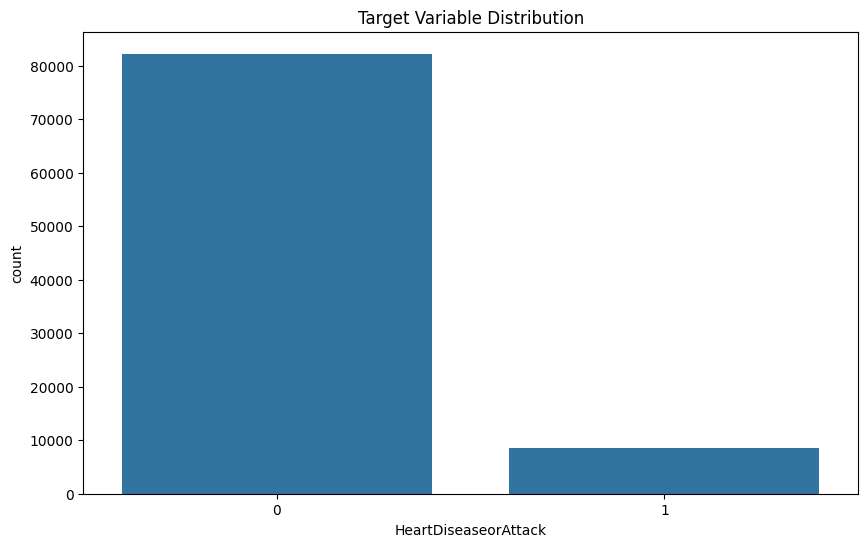

In [6]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='HeartDiseaseorAttack', data=data)
plt.title('Target Variable Distribution')
plt.show()


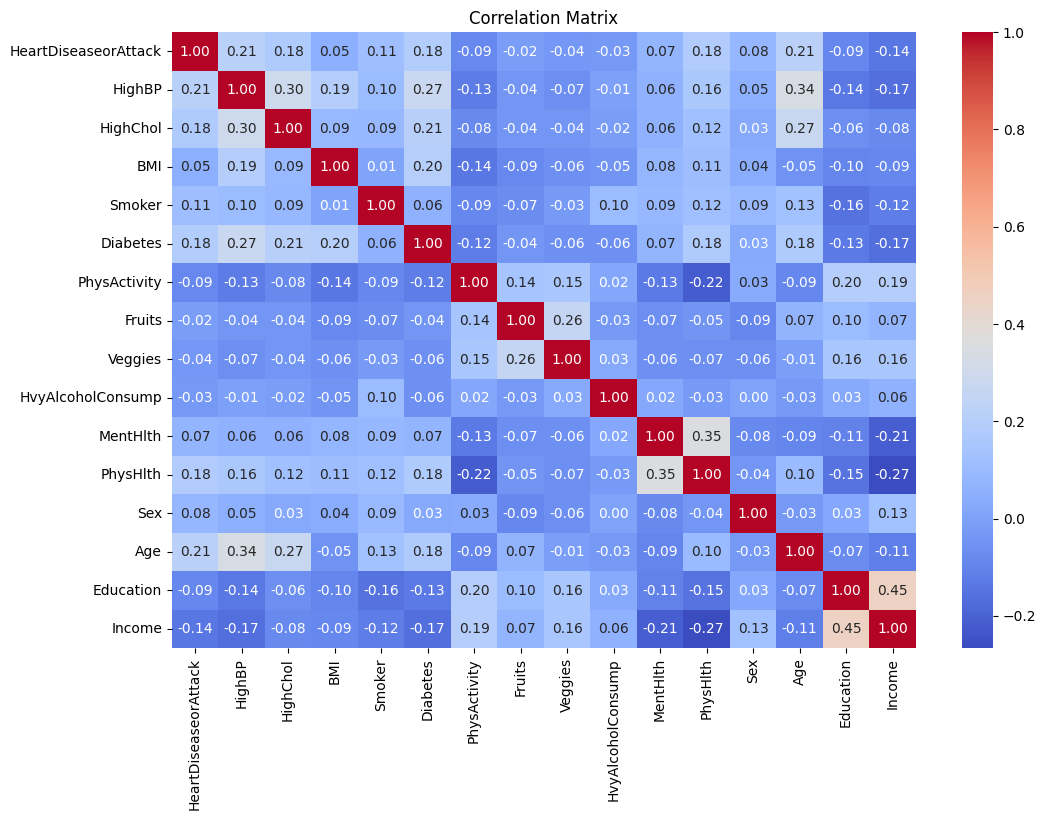

In [7]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Step 3: Data Preprocessing
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']

In [9]:
# Define oversampling and undersampling techniques
oversample = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

In [10]:
# Create a pipeline to handle sampling and scaling
pipeline = Pipeline([
    ('oversample', oversample),
    ('undersample', undersample),
    ('scaler', StandardScaler()),
])

In [12]:
!pip install imblearn

In [17]:
# Apply oversampling and undersampling sequentially
X_resampled, y_resampled = oversample.fit_resample(X, y)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)


In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [21]:
# Step 4: Model Training and Evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [23]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     16351
           1       0.87      0.94      0.90     16550

    accuracy                           0.90     32901
   macro avg       0.90      0.90      0.90     32901
weighted avg       0.90      0.90      0.90     32901


Confusion Matrix:
[[14014  2337]
 [ 1025 15525]]


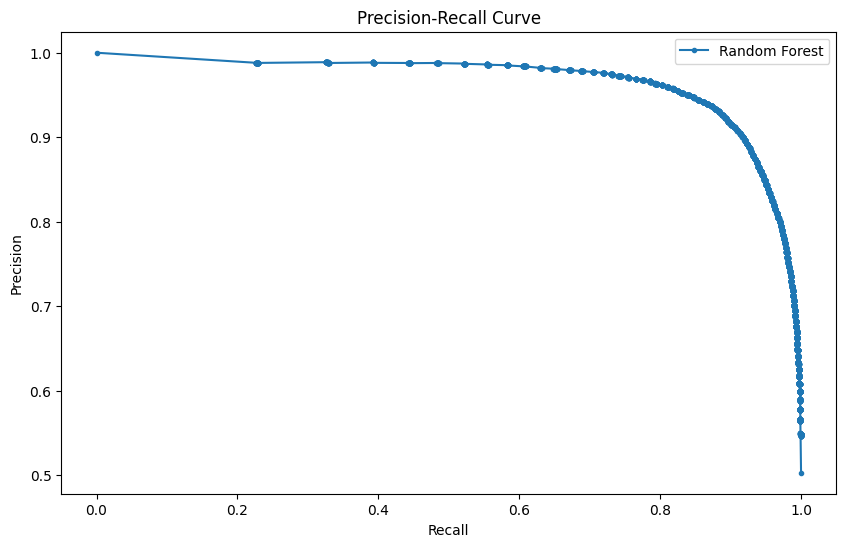

In [24]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


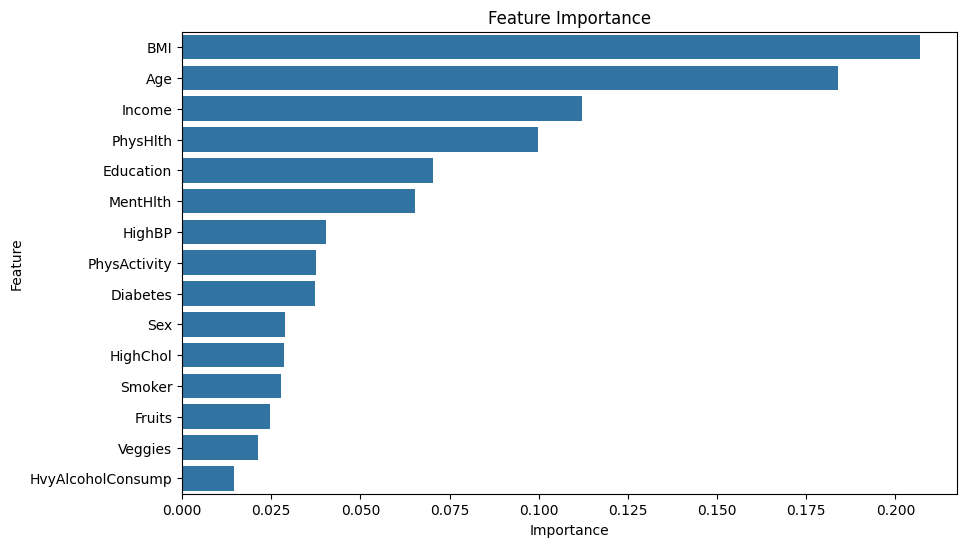

In [25]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

In [26]:
# Step 5: Output Important Drivers
print("\nTop Drivers for Heart Disease or Attack:")
print(feature_importances.head())


Top Drivers for Heart Disease or Attack:
      Feature  Importance
2         BMI    0.206940
12        Age    0.183987
14     Income    0.112271
10   PhysHlth    0.099932
13  Education    0.070461
